# Project: Generative Adverserial Network
---
Note: This is a project strictly for educational purposes.

In this project, we will be using tensorflow to create a GAN (Generative Adverserial Network).

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import Model, layers

tf.keras.backend.clear_session()

# Parameters for the inputs

In [2]:
GAN_OUTPUT_SIZE = (28, 28)

GAN_INPUT_SIZE = (7, 7, 1)

## Generator / Discriminator

In a GAN, there is a Generator and a Discriminator.

The Discriminator is first trained, where it tries to discriminate whether a given sample is a `real sample` or a `generated sample`. The output of the discriminator's neural network will give a probability of the given sample being real.

Once the discriminator is successfully trained, the generator will try to generate a sample for the discriminator. The loss function will be directly related to the output of the discriminator. Thus performing back propagation and training the discriminator.

At last, the discriminator should be able to produce samples which can fool the generator.

Notes:

`LeakyReLU` is used instead of `ReLU` to solve the `dying ReLU` problem.

In [3]:
# Defining the discriminator
class Discriminator(Model):
    batch_size = 64
    kernel_size = ()
    inputs = tf.keras.Input(shape=(28, 28, 1))
    outputs = None

    def __init__(self, INPUT_SHAPE = [...]):
        super().__init__(
            inputs=[], outputs=[],
            name="discriminator"            
        )
        self.INPUT_SHAPE = INPUT_SHAPE

        # Input Layer
        self.inputs = tf.keras.Input(shape=INPUT_SHAPE)

        # Convolution Layer 1
        self.conv1 = layers.Conv2D(
            filters=32,
            kernel_size=(5, 5),
            strides=(2, 2),
            padding="same",
            input_shape=INPUT_SHAPE
            )
        self.leaky_relu_1 = layers.LeakyReLU()
        self.dropout_1 = layers.Dropout(0.3)

        # Convolution Layer 2
        self.conv2 = layers.Conv2D(
            filters=8,
            kernel_size=(5, 5),
            strides=(2, 2),
            padding="same"
        )
        self.leaky_relu_2 = layers.LeakyReLU()
        self.dropout_2 = layers.Dropout(0.3)
        
        # Convolution Layer 3
        self.conv3 = layers.Conv2D(
            filters=1,
            kernel_size=(3, 3),
            strides=(1, 1),
            padding="same"
        )
        self.leaky_relu_3 = layers.LeakyReLU()

        # Flatten and Output layer
        self.flatten_layer = layers.Flatten()
        self.dense_layer = layers.Dense(16)
    
    def call(self, inputs = inputs):
        x = inputs
        x = self.conv1(x)
        x = self.leaky_relu_1(x)
        x = self.dropout_1(x)

        x = self.conv2(x)
        x = self.leaky_relu_2(x)
        x = self.dropout_2(x)
        
        x = self.conv3(x)
        x = self.leaky_relu_3(x)
        x = self.flatten_layer(x)
        x = self.dense_layer(x)

        return x
discriminator = Discriminator((28, 28, 1))
discriminator.call()

discriminator_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0003,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

discriminator.compile(
    loss = 'categorical_crossentropy',
    optimizer=discriminator_optimizer,
    metrics=["accuracy"],
)


discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        832       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           6408      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 8)           0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 8)           0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 1)         

In [4]:
# Defining the Generator
class Generator(Model):
    batch_size = 64
    kernel_size = ()
    inputs = tf.keras.Input(shape=GAN_INPUT_SIZE)
    outputs = None

    def __init__(self, INPUT_SHAPE = [...], OUTPUT_SHAPE = [28, 28]):
        super().__init__(
            inputs=[], outputs=[],
            name="generator"            
        )
        self.INPUT_SHAPE = INPUT_SHAPE

        # Input Layer
        self.inputs = tf.keras.Input(shape=INPUT_SHAPE)

        # # Convolution Layer 1
        # self.conv1 = layers.Conv2DTranspose(
        #     filters=32,
        #     kernel_size=(5, 5),
        #     strides=(2, 2),
        #     padding="same",
        #     input_shape=INPUT_SHAPE
        #     )
        # self.leaky_relu_1 = layers.LeakyReLU()
        # self.dropout_1 = layers.Dropout(0.3)

        # Convolution Layer 2
        self.conv2 = layers.Conv2DTranspose(
            filters=8,
            kernel_size=(5, 5),
            strides=(2, 2),
            padding="same"
        )
        self.leaky_relu_2 = layers.LeakyReLU()
        self.dropout_2 = layers.Dropout(0.3)

        # Convolution Layer 2
        self.conv3 = layers.Conv2DTranspose(
            filters=1,
            kernel_size=(3, 3),
            strides=(2, 2),
            padding="same"
        )

    def call(self, inputs = inputs):
        x = inputs
        # x = self.conv1(x)
        # x = self.leaky_relu_1(x)
        # x = self.dropout_1(x)

        x = self.conv2(x)
        x = self.leaky_relu_2(x)
        x = self.dropout_2(x)

        x = self.conv3(x)

        return x
    
generator = Generator(GAN_INPUT_SIZE)
generator.call()

generator_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0003,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)


generator.compile(
    loss = 'categorical_crossentropy',
    optimizer=generator_optimizer,
    metrics=["accuracy"],
)


generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        208       
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 8)         0         
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        73        
 ranspose)                                                       
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


# Generative Adverserial Network

In [5]:
BATCH_SIZE = 256
latent_dim = GAN_INPUT_SIZE[0] * GAN_INPUT_SIZE[1] * GAN_INPUT_SIZE[2]

In [6]:
# discriminator, generator

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 7, 7, 1])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator.call(noise)
        generated_images = tf.reshape(generated_images, [-1, GAN_OUTPUT_SIZE[0], GAN_OUTPUT_SIZE[1], 1])

        real_output = discriminator.call(images)
        fake_output = discriminator.call(generated_images)

        def generator_loss(fake_output):
            return cross_entropy(tf.ones_like(fake_output), fake_output)

        def discriminator_loss(real_output, fake_output):
            real_loss = cross_entropy(tf.ones_like(real_output), real_output)
            fake_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
            total_loss = real_loss + fake_loss
            return total_loss

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

Training:

In [8]:
SAMPLE_TRAINING_SIZE = 100
BUFFER_SIZE = 100
BATCH_SIZE = 4

(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)[0:SAMPLE_TRAINING_SIZE]
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_images.shape[0])

EPOCHS = 50
global train_loss, disc_loss
for epoch in range(EPOCHS):
    for i, image_batch in enumerate(train_dataset):
        print(image_batch.shape)
        train_loss, disc_loss = train_step(image_batch)
        print(f"first batch done {epoch}.{i}")
    
    if epoch % 1 == 0:
        print(f'Completed epoch {epoch + 1}')
        print(f'Generator Loss: {train_loss}')
        print(f'Discriminator Loss: {disc_loss}')


100
(4, 28, 28, 1)
first batch done 0.0
(4, 28, 28, 1)
first batch done 0.1
(4, 28, 28, 1)
first batch done 0.2
(4, 28, 28, 1)
first batch done 0.3
(4, 28, 28, 1)
first batch done 0.4
(4, 28, 28, 1)
first batch done 0.5
(4, 28, 28, 1)
first batch done 0.6
(4, 28, 28, 1)
first batch done 0.7
(4, 28, 28, 1)
first batch done 0.8
(4, 28, 28, 1)
first batch done 0.9
(4, 28, 28, 1)
first batch done 0.10
(4, 28, 28, 1)
first batch done 0.11
(4, 28, 28, 1)
first batch done 0.12
(4, 28, 28, 1)
first batch done 0.13
(4, 28, 28, 1)
first batch done 0.14
(4, 28, 28, 1)
first batch done 0.15
(4, 28, 28, 1)
first batch done 0.16
(4, 28, 28, 1)
first batch done 0.17
(4, 28, 28, 1)
first batch done 0.18
(4, 28, 28, 1)
first batch done 0.19
(4, 28, 28, 1)
first batch done 0.20
(4, 28, 28, 1)
first batch done 0.21
(4, 28, 28, 1)
first batch done 0.22
(4, 28, 28, 1)
first batch done 0.23
(4, 28, 28, 1)
first batch done 0.24
Completed epoch 1
Generator Loss: 0.052765991538763046
Discriminator Loss: 0.0528

In [10]:
noise = tf.random.normal([BATCH_SIZE, 7, 7, 1])
sample = generator.call(noise)

sample[0]

<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[-1.36850804e-01],
        [-6.37442023e-02],
        [-2.21206576e-01],
        [-4.27344292e-02],
        [-1.39058426e-01],
        [-9.49257240e-03],
        [-1.11170582e-01],
        [-9.51001421e-03],
        [-1.41537145e-01],
        [-2.69544125e-03],
        [-1.48008659e-01],
        [ 7.64405727e-03],
        [-1.83613241e-01],
        [-6.78856596e-02],
        [-1.96729362e-01],
        [-3.17801572e-02],
        [-1.75953329e-01],
        [-3.31429690e-02],
        [-1.61648005e-01],
        [-4.52901237e-02],
        [-1.73843503e-01],
        [-3.38328108e-02],
        [-1.79450989e-01],
        [-5.49259782e-03],
        [-1.43574327e-01],
        [ 2.85182446e-02],
        [-6.76756576e-02],
        [-2.87740566e-02]],

       [[-1.00599378e-01],
        [-6.33212626e-02],
        [-1.01882584e-01],
        [-1.18211009e-01],
        [-3.54777798e-02],
        [-7.47606978e-02],
        [-4.96465564e-02],


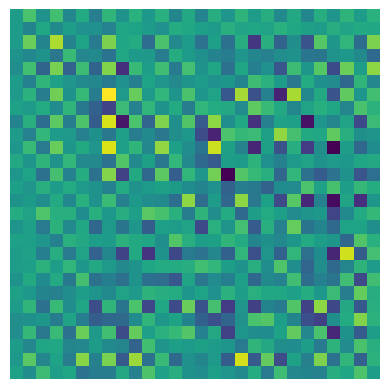

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some fake images using your GAN
image = (sample[3] + 1) / 2

plt.imshow(image)
plt.axis('off')

# Show the plot
plt.show()